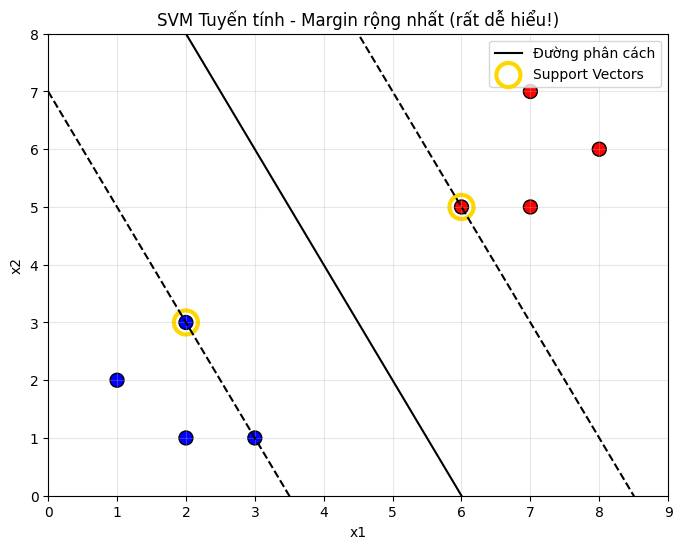

Số support vectors: 2
Chỉ cần vài điểm vàng là quyết định toàn bộ đường phân cách!


In [ ]:
# Ví dụ 1 - SVM tuyến tính 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib.pyplot as plt

# Tạo dữ liệu siêu dễ phân tách
X = np.array([[1, 2], [2, 3], [3, 1], [2, 1],     # lớp 0
              [6, 5], [7, 7], [8, 6], [7, 5]])     # lớp 1
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Huấn luyện SVM tuyến tính
model = svm.SVC(kernel='linear', C=1000)
model.fit(X, y)

# Vẽ dữ liệu + đường phân cách + margin + support vectors
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='bwr', edgecolors='k')

# Vẽ đường phân cách và margin
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(0, 9)
yy = a*xx - (model.intercept_[0])/w[1]

margin = 1 / np.sqrt(np.sum(model.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up   = yy + np.sqrt(1 + a**2) * margin

plt.plot(xx, yy, 'k-', label='Đường phân cách')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# Đánh dấu support vectors
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], 
            s=300, facecolors='none', edgecolors='gold', linewidth=3, label='Support Vectors')

plt.xlim(0,9)
plt.ylim(0,8)
plt.legend()
plt.title("SVM Tuyến tính - Margin rộng nhất (rất dễ hiểu!)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Số support vectors: {len(model.support_vectors_)}")
print("Chỉ cần vài điểm vàng là quyết định toàn bộ đường phân cách!")

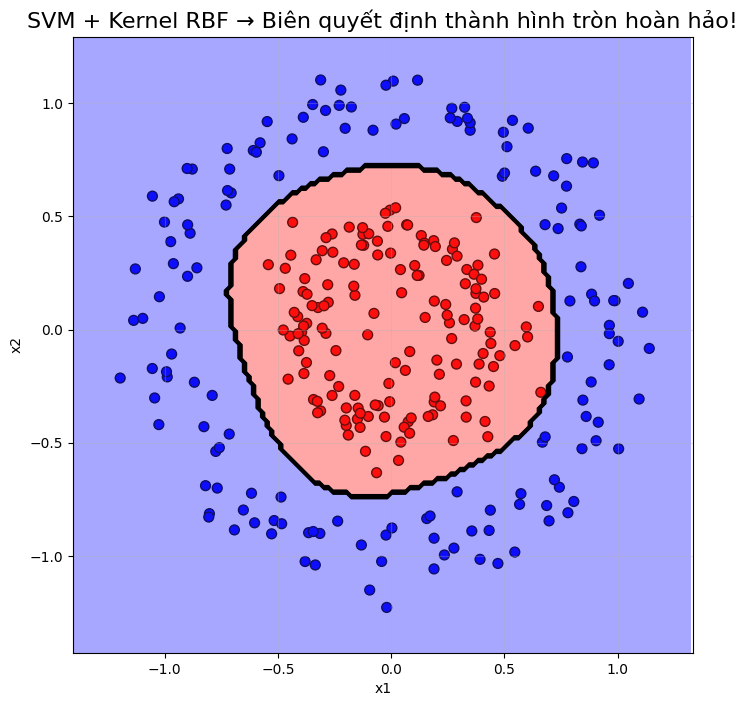

In [3]:
# Ví dụ 2 - Kernel Trick (vòng tròn)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn import svm

# Tạo dữ liệu vòng tròn
X, y = make_circles(n_samples=300, factor=0.4, noise=0.1, random_state=42)

# SVM với kernel RBF
model = svm.SVC(kernel='rbf', C=10, gamma=3)
model.fit(X, y)

# Vẽ
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=50, edgecolors='k')

# Vẽ biên quyết định
h = 0.02
x_min, x_max = X[:,0].min()-0.2, X[:,0].max()+0.2
y_min, y_max = X[:,1].min()-0.2, X[:,1].max()+0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.4)
plt.contour(xx, yy, Z, colors='black', linewidths=1)

plt.title('SVM + Kernel RBF → Biên quyết định thành hình tròn hoàn hảo!', fontsize=16)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()